In [ ]:
# QUESTION 10: Repeat question 10, but now restrict the neighborhood to consist of movies
# from the same community. Is there a better match between the average rating of the movies in the
# restricted neighborhood and the rating of the movie whose neighbors have been extracted. In this
# question, you should have 3 plots.

In [1]:
library(igraph)
library(hash)
library(ggplot2)



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

hash-2.2.6 provided by Decision Patterns



In [2]:
g = read_graph("project4_data/q6_movies_weighted.txt",format="ncol", directed = FALSE)


In [3]:
movies = c('Batman v Superman: Dawn of Justice (2016)',
           'Mission: Impossible - Rogue Nation (2015)',
           'Minions (2015)')

movie_ids = c('9301',
            '35402',
            '71445')

movie_hash = hash()
index_file = file('project4_data/index_movies_list.txt', 'r')
index = 0
while(TRUE){
    line = readLines(index_file, n=1)
    if(length(line) == 0){break}
    
    .set(movie_hash, index, substr(line, start = 11, stop = nchar(line)))
    index = index + 1
}


In [4]:
rating_hash = hash()
rating_file = file('project4_data/movie_rating_fixed.txt','r')
while(TRUE){
    line = readLines(rating_file,  n=1)
    if(length(line) == 0){break}
    arr = strsplit(line, "[\t\t]")
    
    .set(rating_hash, arr[[1]][1], arr[[1]][3])
}

In [5]:
load(file='q7_cluster_fast_greedy.rda')

[1] "===================================================="
[1] "Batman v Superman: Dawn of Justice (2016)"
[1] "9301"
[1] "neighbors: 860"
[1] "community Id: 1"
[1] "average rating: 6.30047244094489"
[1] "===================================================="
[1] "Mission: Impossible - Rogue Nation (2015)"
[1] "35402"
[1] "neighbors: 647"
[1] "community Id: 1"
[1] "average rating: 6.21479028697572"


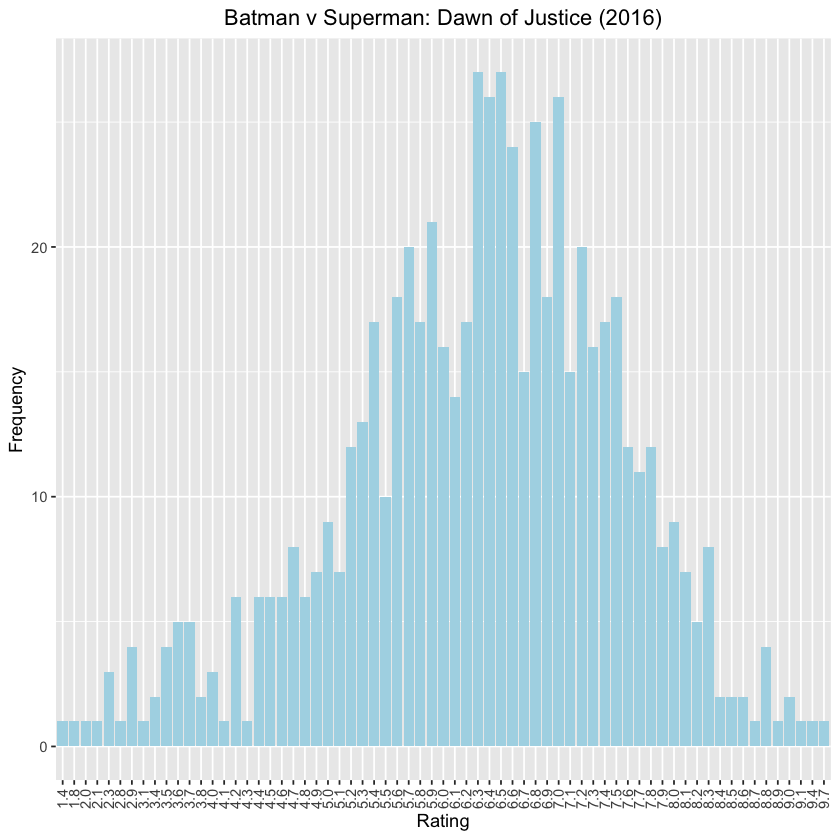

[1] "===================================================="
[1] "Minions (2015)"
[1] "71445"
[1] "neighbors: 656"
[1] "community Id: 1"
[1] "average rating: 6.86750448833035"


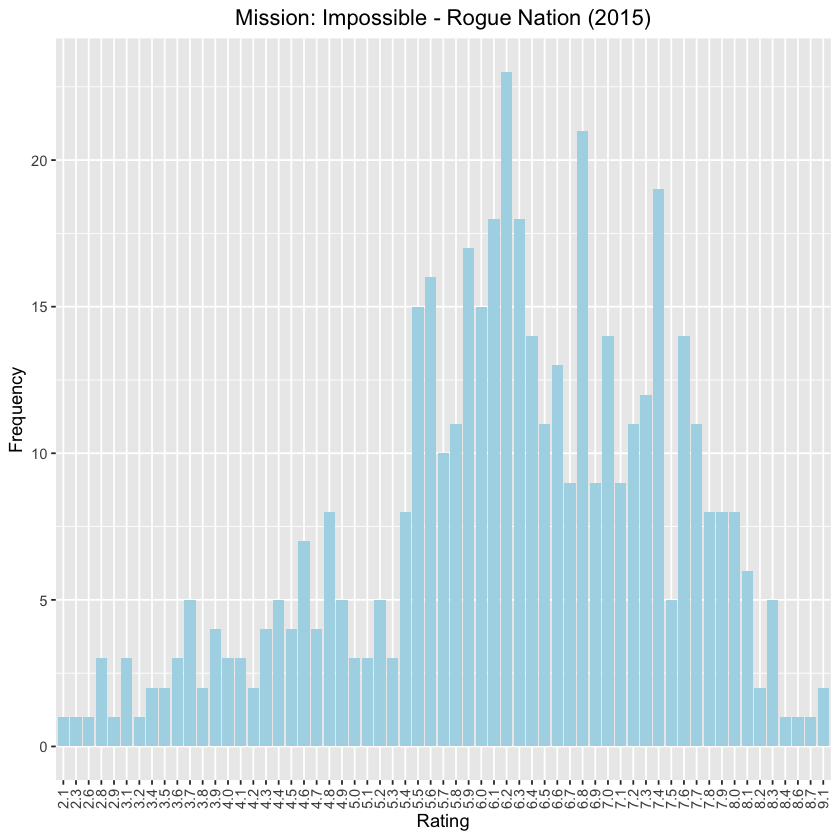

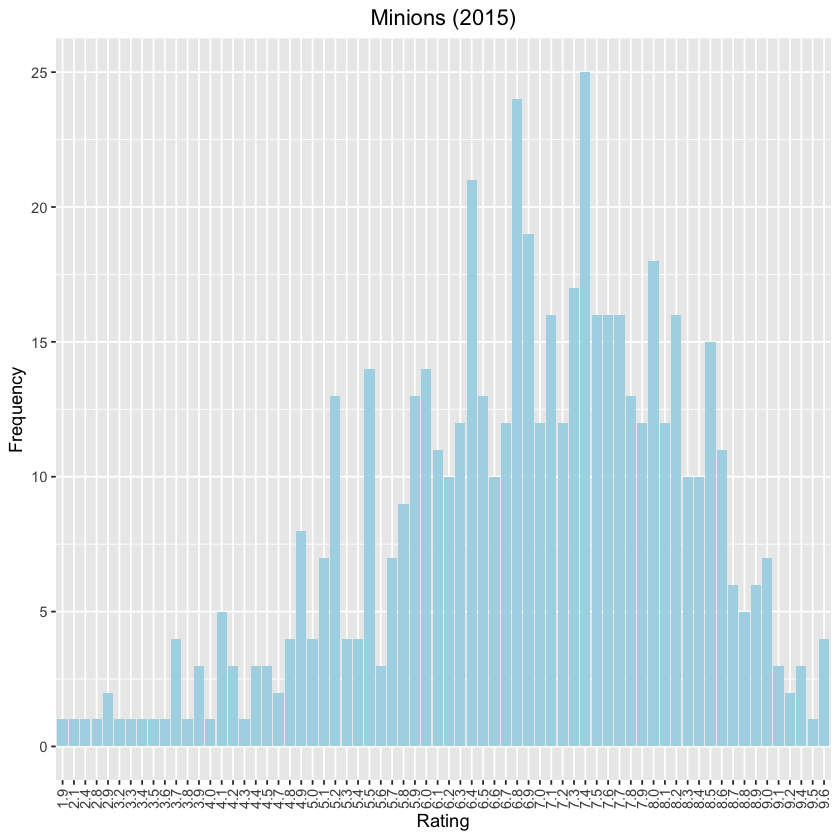

In [6]:
for(i in 1:length(movies)){ #length(movies)
    print(paste('===================================================='))
    movie_id = movie_ids[i]
    print(movies[i])
    print(paste(movie_id))
    movie_neighbors = neighbors(g, movie_id)
    print(paste('neighbors:', length(movie_neighbors)))
    
    sum_rating = 0
    count = 0
    rating_counter = hash()
    
    movie_coummnity_id = 0
    for(k in 1:length(fg)){
        if(movie_id %in% fg[[k]]){
            movie_coummnity_id = k
            break
        }
    }

    print(paste('community Id:',movie_coummnity_id))
    
    for(j in 1:length(movie_neighbors)){ #length(movie_neighbors)
        neighbor_coummunity_id = 0
        
        neighbor_movie_id = movie_neighbors[j]$name
        
        
        # find which community that neighbor is in
        # we want neighbor only in the same community
        for (c in 1:length(fg)){
            if(neighbor_movie_id %in% fg[[c]]){
                neighbor_coummunity_id = c
            }
        }
                
        if(neighbor_coummunity_id == movie_coummnity_id){
            neighbor_movie_in_community = movie_hash[[movie_neighbors[j]$name]]
            neighbor_movie_rating_in_community = rating_hash[[neighbor_movie_in_community]]
            
            if(!is.null(neighbor_movie_rating_in_community)){
                # if you add null in R, object just becomes null..
                sum_rating = sum_rating + as.numeric(neighbor_movie_rating_in_community)
                count = count + 1
                if (is.null(rating_counter[[neighbor_movie_rating_in_community]])){
                .set(rating_counter, neighbor_movie_rating_in_community, 0)
                }
                
                #add 1 to counter of key
                .set(rating_counter, neighbor_movie_rating_in_community, rating_counter[[neighbor_movie_rating_in_community]] + 1)
            }
        }

    }
    
    print(paste("average rating:", sum_rating/count))
    
    keys = c()
    values = c()

    for(e in ls(rating_counter)){
        keys = c(keys, e)
        values = c(values, rating_counter[[e]])
    }
    
    df = data.frame(rating=keys, freq=values)
    hist_plot = ggplot(df, aes(x=rating, y=freq))+
    geom_bar(stat = "identity", fill="lightblue")+
    labs(title=movies[i], x="Rating",y="Frequency")+
    theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 90, hjust = 0.5, vjust = 0.5))
    print(hist_plot)    
        
          
}